In [1]:
# 6.1.4 Create Latitude and Longitude Combinations

In [2]:
# Import the dependencies. 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

In [3]:
# Create a set of random latitude and longitude combinations. 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list. 
coordinates = list(lat_lngs)

In [5]:
# Use the print () function to display the latitude and longitude combinations. 
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

34.65427717981326 -4.336261646829541
-0.2754477546972822 25.751756819415107
10.387650413078475 -114.60527147482814
16.67003026960765 35.72161064790728
21.77062044247691 19.36755740320018
1.9606203056141709 -170.3185643718168
37.6106447443735 -19.306651086797785
-65.36348640373238 67.42296404791583
17.412467111740284 111.12802145256313
-38.786570141363995 104.45033631619242
3.9209930584381567 121.26885366372386
-67.10605754889532 -155.6801398259221
61.42340829631027 157.00130361527243
-63.25122608763424 90.56938836529929
37.83037431611629 -143.55800157967883
-29.55046374829537 -123.32002866180284
5.614613349673263 118.81693506590881
-8.994377462156876 35.719266127723074
-19.806845607665522 108.3091731094899
56.72041361125474 -166.8465228448418
-47.32278977988348 128.09617108153526
85.90983823997448 149.285598288494
9.862357178048484 134.44515299964752
36.18265336619831 146.608415748055
-88.48752520311314 172.53334002222556
-27.85985344775297 98.56338974893691
-50.632939161127595 14.1498

3.579718526147971 107.25148912354064
72.84160848570167 137.85318516250578
36.499111685481324 122.9805418694271
40.465421836177086 11.938138142473179
76.19601948934488 -101.52498267494805
-17.16297096474871 138.7368931435975
-76.6092009189437 66.34972809619907
-87.540128073839 134.8381724619182
87.12945986252257 -172.89842391739458
-20.78928926830295 -60.38007197705363
-62.270806643499526 -13.247484852676706
-32.523259841469915 32.31196777485178
41.344749203793526 2.277145676222375
63.91697902008306 -169.30189219286376
34.71470244782493 -93.13397160997857
-54.65304073587684 146.821796552609
-51.49295038386729 15.552387288347091
86.46946266356241 -51.87263486774782
27.017166992374783 -78.25120370554984
43.16582955307226 11.467738993762538
39.85222242173887 177.83344611939873
-12.93905273305613 17.216142918478198
2.743811389728151 159.31216213843362
77.7877677824952 -171.0547791713643
70.62650092421458 60.12374688037693
-25.557088204900907 -60.03334852993339
18.035524975505027 85.74000128

71.4457991347085 -60.62663506966926
-76.1778600595427 73.46223959910893
35.46098550448319 112.64179474610296
-20.498479740271605 61.83315034478923
-27.394314305824338 -99.5035530627931
-83.10226377616785 -97.96365624369227
18.477872013964713 19.85588571213745
-43.76807837130127 -176.4369885759652
30.732053584916372 -25.84098848712449
-69.87857651749437 68.77698371499551
67.31306263955298 6.553431776813511
51.3303582165957 48.13038072845009
-13.206569679883188 -179.1529903804789
38.09409868723105 4.256263200981152
-3.9113152037576526 150.50557815083334
56.601799556755225 109.6559776410657
16.876878619849606 161.60391893835737
-83.08325910878564 -58.04724154534715
-6.188692728197196 -18.794750182306814
63.40628426296837 112.00821176953036
19.7601853944566 -145.16269583694742
-42.6936203026476 -138.71381177571146
40.436923411046536 -173.98868451888225
-43.49439094120579 109.93403843323671
9.170405864712606 147.4657416249055
65.91354959740434 -163.85239631090414
24.557437280890824 163.9360

In [6]:
# 6.1.5 Generate Random World Cities

In [7]:
from citipy import citipy
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


592

In [10]:
# 6.2.6 Get the City Weather Data

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tawnat
City not found. Skipping...
Processing Record 2 of Set 1 | kisangani
Processing Record 3 of Set 1 | san patricio
Processing Record 4 of Set 1 | wagar
Processing Record 5 of Set 1 | faya
Processing Record 6 of Set 1 | saleaula
City not found. Skipping...
Processing Record 7 of Set 1 | ponta do sol
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | wanning
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | sapa
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | omsukchan
Processing Record 14 of Set 1 | fortuna
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | taganak
Processing Record 17 of Set 1 | mlimba
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | port lincoln
Processing Record 21 of Set 1 | chokurdakh
Process

Processing Record 39 of Set 4 | longyearbyen
Processing Record 40 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 41 of Set 4 | narsaq
Processing Record 42 of Set 4 | palmer
Processing Record 43 of Set 4 | avera
Processing Record 44 of Set 4 | nanortalik
Processing Record 45 of Set 4 | san juan de los morros
Processing Record 46 of Set 4 | ahipara
Processing Record 47 of Set 4 | bajos de haina
Processing Record 48 of Set 4 | lucea
Processing Record 49 of Set 4 | port elizabeth
Processing Record 50 of Set 4 | hasaki
Processing Record 1 of Set 5 | chubbuck
Processing Record 2 of Set 5 | ribeira grande
Processing Record 3 of Set 5 | metro
Processing Record 4 of Set 5 | luderitz
Processing Record 5 of Set 5 | barbar
City not found. Skipping...
Processing Record 6 of Set 5 | lebu
Processing Record 7 of Set 5 | bucerias
Processing Record 8 of Set 5 | jalu
Processing Record 9 of Set 5 | victoria
Processing Record 10 of Set 5 | diego de almagro
Processing Record 11 of Set

Processing Record 24 of Set 8 | dzhebariki-khaya
Processing Record 25 of Set 8 | rudnogorsk
Processing Record 26 of Set 8 | warqla
City not found. Skipping...
Processing Record 27 of Set 8 | cavaillon
Processing Record 28 of Set 8 | porto santo
Processing Record 29 of Set 8 | honningsvag
Processing Record 30 of Set 8 | sioux lookout
Processing Record 31 of Set 8 | gizo
Processing Record 32 of Set 8 | putai
Processing Record 33 of Set 8 | maracas
Processing Record 34 of Set 8 | yilan
Processing Record 35 of Set 8 | inhambane
Processing Record 36 of Set 8 | brownsville
Processing Record 37 of Set 8 | safwah
City not found. Skipping...
Processing Record 38 of Set 8 | houma
Processing Record 39 of Set 8 | najran
Processing Record 40 of Set 8 | ostrovnoy
Processing Record 41 of Set 8 | aasiaat
Processing Record 42 of Set 8 | bargal
City not found. Skipping...
Processing Record 43 of Set 8 | sakaiminato
Processing Record 44 of Set 8 | soroti
Processing Record 45 of Set 8 | banda aceh
Process

Processing Record 12 of Set 12 | brokopondo
Processing Record 13 of Set 12 | san quintin
Processing Record 14 of Set 12 | shakawe
Processing Record 15 of Set 12 | angoram
Processing Record 16 of Set 12 | verkhnevilyuysk
Processing Record 17 of Set 12 | egvekinot
Processing Record 18 of Set 12 | ivnya
Processing Record 19 of Set 12 | tshane
Processing Record 20 of Set 12 | bolu
Processing Record 21 of Set 12 | nago
Processing Record 22 of Set 12 | mangrol
Processing Record 23 of Set 12 | hellin
Processing Record 24 of Set 12 | abu dhabi
Processing Record 25 of Set 12 | vao
Processing Record 26 of Set 12 | linchuan
City not found. Skipping...
Processing Record 27 of Set 12 | dingle
Processing Record 28 of Set 12 | navolato
Processing Record 29 of Set 12 | doctor pedro p. pena
City not found. Skipping...
Processing Record 30 of Set 12 | santiago del estero
Processing Record 31 of Set 12 | cuenca
Processing Record 32 of Set 12 | labuhan
Processing Record 33 of Set 12 | takeo
Processing Rec

In [12]:
len(city_data)

537

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kisangani,0.5167,25.2000,71.20,92,84,2.06,CD,2022-07-12 03:41:47
1,San Patricio,28.0170,-97.5169,85.89,77,12,12.88,US,2022-07-12 03:41:48
2,Wagar,16.1525,36.2032,77.32,72,93,14.16,SD,2022-07-12 03:41:48
3,Faya,18.3851,42.4509,64.51,48,100,5.57,SA,2022-07-12 03:41:48
4,Ponta Do Sol,32.6667,-17.1000,69.01,71,28,5.48,PT,2022-07-12 03:41:48
5,Wanning,18.8003,110.3967,84.15,85,34,9.10,CN,2022-07-12 03:41:49
6,Busselton,-33.6500,115.3333,62.47,67,51,12.48,AU,2022-07-12 03:40:44
7,Sapa,5.1544,120.3241,85.46,68,82,8.97,PH,2022-07-12 03:41:49
8,Mataura,-46.1927,168.8643,43.48,94,100,10.54,NZ,2022-07-12 03:41:49
9,Omsukchan,62.5333,155.8000,90.12,25,43,13.42,RU,2022-07-12 03:41:50


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kisangani,CD,2022-07-12 03:41:47,0.5167,25.2000,71.20,92,84,2.06
1,San Patricio,US,2022-07-12 03:41:48,28.0170,-97.5169,85.89,77,12,12.88
2,Wagar,SD,2022-07-12 03:41:48,16.1525,36.2032,77.32,72,93,14.16
3,Faya,SA,2022-07-12 03:41:48,18.3851,42.4509,64.51,48,100,5.57
4,Ponta Do Sol,PT,2022-07-12 03:41:48,32.6667,-17.1000,69.01,71,28,5.48
5,Wanning,CN,2022-07-12 03:41:49,18.8003,110.3967,84.15,85,34,9.10
6,Busselton,AU,2022-07-12 03:40:44,-33.6500,115.3333,62.47,67,51,12.48
7,Sapa,PH,2022-07-12 03:41:49,5.1544,120.3241,85.46,68,82,8.97
8,Mataura,NZ,2022-07-12 03:41:49,-46.1927,168.8643,43.48,94,100,10.54
9,Omsukchan,RU,2022-07-12 03:41:50,62.5333,155.8000,90.12,25,43,13.42


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV. 
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [ ]:
# 6.3.2 Plot Latitude vs. Temperature

In [16]:
# Extract relevant fields from the DataFrame for plotting. 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

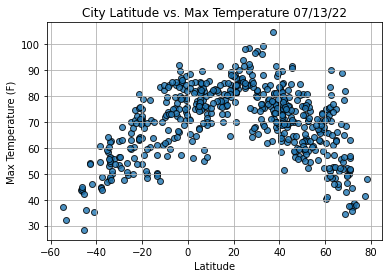

In [17]:
# Import the time module.
import time

#Build the scatter plot for latitude vs. max temperature. 
plt.scatter(lats, 
           max_temps, 
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties. 
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. 
plt.savefig("weather_data/Fig1.png")

# Show plot. 
plt.show()

In [18]:
# 6.3.2 Plot Latitude vs. Humidity

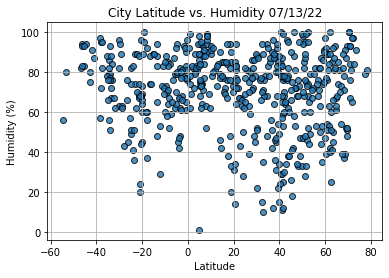

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [20]:
# 6.3.3 Plot Latitude vs. Cloudiness

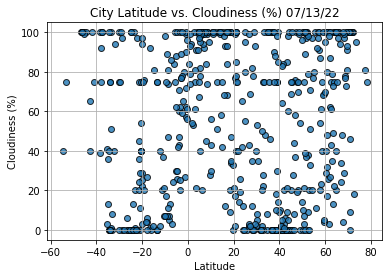

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [22]:
# 6.3.4 Plot Latitude vs. Wind Speed

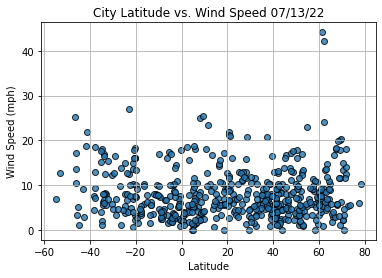

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()
